In [5]:
#Recognising handwriting digits on MNIST Dataset using KNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data Preperation
df=pd.read_csv("train.csv")
df.head()
data=df.values
X=data[:,1:]
Y=data[:,0]


#split data 80% for training
split=int(0.8*X.shape[0])
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]


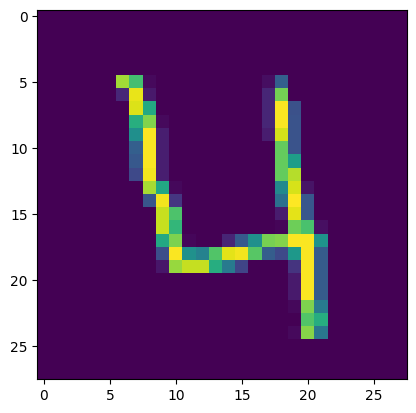

In [7]:
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

drawImg(X_train[3])

In [11]:
#Make Prediction
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]

    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    #Nearest First K points
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index ]
    return pred




pred=knn(X_train,Y_train,X_test[1]) 